# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv('Bank-data.csv')
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [3]:
data = raw_data.drop('Unnamed: 0', axis=1)
data['y'] = data['y'].map({'yes':1, 'no':0})

In [4]:
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [5]:
reg_log = smf.logit('y ~ duration', data=data[['y', 'duration']])
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 May 2023   Pseudo R-squ.:                  0.2121
Time:                        08:48:58   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

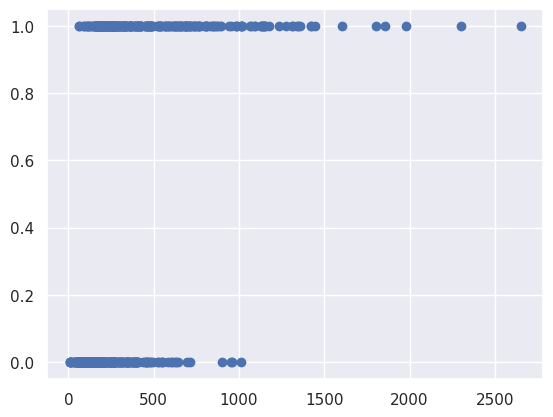

In [6]:
plt.scatter(data['duration'], data['y'])
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [31]:
inputs = data[['duration', 'interest_rate', 'march', 'credit', 'previous']]
target = data['y']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs[['duration', 'interest_rate']])
scaled_inputs = scaler.transform(inputs[['duration', 'interest_rate']])
scaled_inputs_df = pd.DataFrame(data=scaled_inputs, columns=['duration', 'interest_rate'] )
scaled_inputs_df = pd.concat([scaled_inputs_df, inputs[['march', 'credit', 'previous']]], axis=1)

In [32]:
scaled_inputs_df.describe()

,duration,interest_rate,march,credit,previous
count,5.180000e+02,5.180000e+02,518.000000,518.000000,518.000000
mean,7.544373e-17,-1.491728e-16,0.266409,0.034749,0.127413
std,1.000967e+00,1.000967e+00,0.442508,0.183321,0.333758
min,-1.084934e+00,-1.173690e+00,0.000000,0.000000,0.000000
25%,-6.604701e-01,-9.562343e-01,0.000000,0.000000,0.000000
50%,-3.363078e-01,-7.305119e-01,0.000000,0.000000,0.000000
75%,2.923926e-01,1.130998e+00,1.000000,0.000000,0.000000
max,6.601928e+00,1.138198e+00,1.000000,1.000000,1.000000


In [38]:
x = sm.add_constant(scaled_inputs_df)
reg_log2 = sm.Logit(target, x)
results_log2 = reg_log2.fit()
results_log2.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Wed, 17 May 2023   Pseudo R-squ.:                  0.5143
Time:                        09:41:37   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3689      0.167      2.203      0.028       0.041       0.697
duration          2.3931      0.255      9.381      0.000       1.893       2.893
interest_rate    -1.5003      0.168     -8.943      0.000      -1.829      -1.172
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
=================================================================================
"""

In [42]:
cm_df = pd.DataFrame(results_log2.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


In [43]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.862934362934363

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [9]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [46]:
# results_log2.pred_table()
confusion_matrix(x, target, results_log2)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [11]:
raw_test = pd.read_csv('Bank-data-testing.csv')
test = raw_test.drop('Unnamed: 0', axis=1)
test['y'] = test['y'].map({'yes':1, 'no':0})

In [82]:
test.describe()

,interest_rate,credit,march,may,previous,duration,y
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000
mean,2.922095,0.031532,0.274775,0.346847,0.099099,398.860360,0.50000
std,1.891766,0.175144,0.447410,0.755950,0.299470,410.565798,0.50113
min,0.639000,0.000000,0.000000,0.000000,0.000000,6.000000,0.00000
25%,1.049250,0.000000,0.000000,0.000000,0.000000,144.750000,0.00000
50%,1.714000,0.000000,0.000000,0.000000,0.000000,255.500000,0.50000
75%,4.960000,0.000000,1.000000,0.000000,0.000000,525.250000,1.00000
max,4.968000,1.000000,1.000000,4.000000,1.000000,3643.000000,1.00000


### Declare the dependent and the independent variables

In [85]:
test_data = test.drop(['y'], axis=1)
test_actual = test['y']
test_data = test_data[scaled_inputs_df.columns.values]
test_data = sm.add_constant(test_data)

In [86]:
target.describe()

count    518.000000
mean       0.500000
std        0.500483
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: y, dtype: float64

In [87]:
test_actual.describe()

count    222.00000
mean       0.50000
std        0.50113
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000
Name: y, dtype: float64

In [88]:
predicted_y = results_log2.predict(test_data)

In [89]:
predicted_y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
217    1.0
218    1.0
219    1.0
220    1.0
221    1.0
Length: 222, dtype: float64

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [90]:
confusion_matrix(test_data, test_actual, results_log2)

(array([[  0., 111.],
        [  0., 111.]]),
 0.5)